In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.0.0'

In [4]:
a = tf.constant([[1, 2],
                 [3, 4]])

In [5]:
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [6]:
a.numpy()

array([[1, 2],
       [3, 4]], dtype=int32)

In [7]:
w = tf.Variable([[1.0]])

In [8]:
with tf.GradientTape() as tape:
    loss = w * w

In [9]:
grad = tape.gradient(loss,w)

In [10]:
grad

<tf.Tensor: id=17, shape=(1, 1), dtype=float32, numpy=array([[2.]], dtype=float32)>

In [11]:
tape.gradient(loss,w)

RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

## mnist

In [14]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

In [15]:
mnist_images.shape

(60000, 28, 28)

In [16]:
mnist_images[...,tf.newaxis].shape

(60000, 28, 28, 1)

In [17]:
mnist_images.reshape(60000,28,28,1) == mnist_images[...,tf.newaxis]

array([[[[ True],
         [ True],
         [ True],
         ...,
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ...,
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ...,
         [ True],
         [ True],
         [ True]],

        ...,

        [[ True],
         [ True],
         [ True],
         ...,
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ...,
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ...,
         [ True],
         [ True],
         [ True]]],


       [[[ True],
         [ True],
         [ True],
         ...,
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ...,
         [ True],
         [ True],
         [ T

In [18]:
dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
    tf.cast(mnist_labels,tf.int64)))

In [19]:
dataset

<TensorSliceDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

In [20]:
BATCH_SIZE=32
NUM_EPOCHS=5

In [21]:
dataset = dataset.shuffle(1000).batch(BATCH_SIZE)

In [22]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,[3,3],activation='relu',input_shape=(None,None,1)),
    tf.keras.layers.Conv2D(16,[3,3],activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

In [23]:
for images,labels in dataset.take(1):
    print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.05176893  0.00071656 -0.02441357 -0.0042013   0.07637648  0.01156457
  -0.04497184  0.07094368  0.09646451  0.01190518]]


In [24]:
optimizer = tf.keras.optimizers.SGD()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []

In [25]:
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True)
        
        # there are 10 targets
        tf.debugging.assert_equal(logits.shape,(BATCH_SIZE,10))
        
        loss_value = loss(labels,logits)
    
    loss_history.append(loss_value.numpy().mean())
    grads = tape.gradient(loss_value,mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

In [26]:
def train():
    for epoch in range(1,NUM_EPOCHS+1):
        
        for (batch, (images,labels)) in enumerate(dataset):
            train_step(images,labels)
                
        print('finished epoch: {}'.format(epoch))

In [27]:
train()

finished epoch: 1
finished epoch: 2
finished epoch: 3
finished epoch: 4
finished epoch: 5


Text(0, 0.5, 'Loss [entropy]')

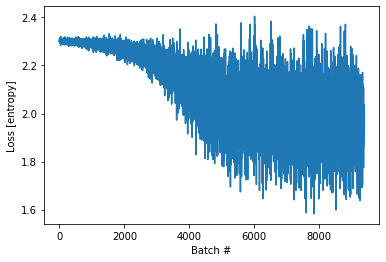

In [28]:
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')